# $\S$ 2.4. Statistical Decision Theory

In this section we develop a small amount of theory that provides a framework for developing models. We first consider the case of a quantitative output, and place outselves in the world of random variables nad probability spaces.

### Definitions

Let
* $X\in\mathbb{R}^p$ denote a real valued random input vector, and
* $Y\in\mathbb{R}$ a real valued random output variable,
* with joint distribution $\text{Pr}(X,Y)$.

We seek a function $f(X)$ for predicting $Y$  given values of the input $X$.

#### Loss
This Theory requires a _loss function_ $L(Y, f(X))$ for penalizing errors in prediction, and by for the most common and convenient is _squared error loss_:

\begin{equation}
L(Y, f(X)) = (Y-f(X))^2.
\end{equation}

#### Expected prediction error
This leads us to a criterion for choosing $f$ the expected (squared) prediction error:

\begin{align}
\text{EPE}(f) &= \text{E}(Y-f(X))^2\\
&= \int\left(y-f(x)\right)^2\text{Pr}(dx,dy),
\end{align}

By conditioning on $X$, we can write EPE as

\begin{equation}
\text{EPE}(f) = \text{E}_X\text{E}_{Y|X}\left(\left[Y-f(X)\right]^2|X\right)
\end{equation}

and we see that it suffices to minimize EPE pointwise:

\begin{equation}
f(x) = \arg\min_c\text{E}_{Y|X}\left(\left[Y-c\right]^2|X=x\right)
\end{equation}

#### Regression function
The solution is the conditional expectation a.k.a. the _regression_ function:

\begin{equation}
f(x) = \text{E}\left(Y|X=x\right)
\end{equation}

> Thus the best prediction of $Y$ at any point $X=x$ is the conditional mean, when best is measured by average squared error.

### Conclusions first

Both KNN and least squares will end up approximating conditional expectations by averages. But they differ dramatically in terms of model assumptions:
* Least squares assumes $f(x)$ is well approximated by a globally linear function.
* $k$-nearest neighbors assumes $f(x)$ is well approximated by a locally constant function.
Although the latter seems more palatable, we will see below that we may pay a price for this flexibility.

### The light and shadows of kNN

The kNN attempts to directly implement this recipe using the training data:

\begin{equation}
\hat{f}(x) = \text{Ave}\left(y_i|x_i\in N_k(x)\right),
\end{equation}

where
* "$\text{Ave}$" denotes average, and
* $N_k(x)$ is the neighborhood containing the $k$ points in $\mathcal{T}$ closest to $x$.

Two approximations are happening here:
* Expectation is approximated by averaging over sample data;
* conditioning at a point is relaxed to conditioning on some region "close" to the target point.

For large training sample size $N$, the points in the neighborhood are likely to be close to $x$, and as $k$ gets large the average will get more stable. In fact, under mild regularity conditions on the joint probability distribution $\text{Pr}(X,Y)$, one can show that

\begin{equation}
\hat{f}(x)\rightarrow\text{E}(Y|X=x)\text{ as }N,k\rightarrow\infty\text{ s.t. }k/N\rightarrow0
\end{equation}

#### Isn't it perfect?

In light of this, why look further, since it seems we have a universal approximator?
* We often do not have very large samples.  
  Linear models can usually get a more stable estimate than kNN, provided the structured model is appropriate (although such knowledge has to be learned from the data as well).
* Curse of dimensionality.  
  As the dimension $p$ gets large, so does the metric size of the $k$-nearest neighborhood. So settling for kNN as a surrogate for conditioning will fail us miserably.  
  The convergence above still holds, but the _rate_ of convergence decreases as the dimension increases.

### Model-based approach for linear regression

How does linear regression fit into this framework? The simplest explanation is that one assumes that the regression function $f(x)$ is approximately linear in its arguments:

\begin{equation}
f(x)\approx x^T\beta.
\end{equation}

This is a model-based approach -- we specify a model for the regression function. 

Plugging this linear model for $f(x)$ into EPE and differentiating, we can solve for $\beta$ theoretically:

\begin{equation}
\beta = \left[\text{E}\left(XX^T\right)\right]^{-1}\text{E}(XY)
\end{equation}

Note we have _not_ conditioned on $X$; rather we have used out knowledge of the functional relationship to _pool_ over values of $X$. The least squares solution

\begin{equation}
\hat\beta = \left( \mathbf{X}^T \mathbf{X} \right)^{-1} \mathbf{X}^T \mathbf{y}
\end{equation}

amounts to replacing the expectation in the theoretical solution by averages over the training data.

### kNN vs. least squares

So both kNN and least squares end up approximating conditional expectations by averages. But they differ dramatically in terms of model assumptions:
* Least squares assumes $f(x)$ is well approximated by a globally linear function.
* kNN assumes $f(x)$ is well approximated by a locally constant function.

Although the latter seems more palatable, we have already seen that we may pay a price for this flexibility.

### Additive models (Brief on modern techniques)

Many of the more modern techniques described in this book are model based, although far more flexible than the rigid linear model.

For example, additive models assume that

\begin{equation}
f(X) = \sum_{j=1}^p f_j(X_j).
\end{equation}

This retains the additivity of the linear model, but each coordinate function $f_j$ is arbitrary. It turns out that the optimal estimate for the additive model uses techniques such as kNN to approximate _univariate_ conditional expectations _simultaneously_ for each of the coordinate functions.

Thus the problems of estimating a conditional expectation in high dimensions are swept away in this case by imposing some (often unrealistic) model assumptions, in this case additivity.

### Are we happy with $L_2$ loss? Yes, so far.

If we replace the $L_2$ loss function with the $L_1$:

\begin{equation}
E\left| Y - f(X) \right|,
\end{equation}

the solution in this case is the conditional median,

\begin{equation}
\hat{f}(x) = \text{median}(Y|X=x),
\end{equation}

which is a different measure of location, and its estimates are more robust than those for the conditional mean.

$L_1$ criteria have discontinuities in their derivatives, which have hindered their widespread use. Other more resistant loss functions will be mentioned in later chapters, but squared error is analytically convenient and the most popular.

### Bayes classifier: For a categorical output with 0-1 loss function

The same paradigm works when the output is a categorical variale $G$, except we need a different loss function for penalizing prediction errors. An estimate $\hat{G}$ will assume values in $\mathcal{G}$, the set of possible classes.

Our loss function can be represented by $K\times K$ matrix $\mathbf{L}$, where $K=\text{card}(\mathcal{G})$. $\mathbf{L}$ will be zero on the diagonal and nonnegative elsewhere, representing the price paid for misclassifying $\mathcal{G}_k$ as $\mathcal{G}_l$;

\begin{equation}
\mathbf{L} = \begin{bmatrix}
0 & L(\mathcal{G}_1, \mathcal{G}_2) & \cdots & L(\mathcal{G}_1, \mathcal{G}_K) \\
L(\mathcal{G}_2, \mathcal{G}_1) & 0 & \cdots & L(\mathcal{G}_2, \mathcal{G}_K) \\
\vdots & \vdots & \ddots & \vdots \\
L(\mathcal{G}_K, \mathcal{G}_1) & L(\mathcal{G}_K, \mathcal{G}_2) & \cdots & 0
\end{bmatrix}
\end{equation}

The expected prediction error is

\begin{equation}
\text{EPE} = \text{E}\left[L(G, \hat{G}(X)\right],
\end{equation}

where the expectation is taken w.r.t. the joint distribution $\text{Pr}(G, X)$.

Again we condition, and can write EPE as

\begin{equation}
\text{EPE} = \text{E}_X\sum^K_{k=1}L\left(\mathcal{G}_k, \hat{G}(X)\right)\text{Pr}\left(\mathcal{G}_k|X\right)
\end{equation}

and again it suffices to minimize EPE pointwise:

\begin{equation}
\hat{G}(x) = \arg\min_{g\in\mathcal{G}}\sum^K_{k=1} L\left(\mathcal{G}_k,g\right)\text{Pr}\left(\mathcal{G}_k|X=x\right)
\end{equation}

#### 0-1 loss for Bayes classifier

Most often we use the _zero-one_ loss function, where all misclassifications are charged a single unit, i.e.,

\begin{equation}
L(k,l) = \begin{cases}
0\text{ if }k = l,\\
1\text{ otherwise}.
\end{cases}
\end{equation}

With the 0-1 loss function this simplifies to

\begin{align}
\hat{G}(x) &= \arg\min_{g\in\mathcal{G}} \left[1 - \text{Pr}(g|X=x)\right]\\
&= \mathcal{G}_k \text{ if Pr}\left(\mathcal{G}_k|X=x\right) = \max_{g\in\mathcal{G}}\text{Pr}(g|X=x)
\end{align}

This reasonable solution is known as the _Bayes classifier_, and says that we classify to the most probable class, using the conditional (discrete) distribution $\text{Pr}(G|X)$. FIGURE 2.5 shows the Bayes-optimal decision boundary for our simulation example. The error rate of the Bayes classifier is called the _Bayes rate_.

In [1]:
%matplotlib inline
import random
import scipy
import scipy.stats
import matplotlib.pyplot as plt

In [2]:
"""FIGURE 2.5. The optimal Bayes decision boundary for the simulation example.
Since the generating density is known for each class, this decision boundary can be
calculated exactly."""
sample_size = 100
# Parameters for mean distributions
mean_blue = [1, 0]
mean_orange = [0, 1]
mean_cov = scipy.eye(2)
mean_size = 10

# Additional parameters for blue and orange distributions
sample_cov = scipy.eye(2)/5

# Generate mean components for blue and orange (10 means for each)
sample_blue_mean = scipy.random.multivariate_normal(mean_blue, mean_cov, mean_size)
sample_orange_mean = scipy.random.multivariate_normal(mean_orange, mean_cov, mean_size)

# Generate blue points
sample_blue = scipy.array([
    scipy.random.multivariate_normal(sample_blue_mean[r], sample_cov)
    for r in scipy.random.randint(0, 10, 100)
])
y_blue = scipy.zeros(sample_size)

# Generate orange points
sample_orange = scipy.array([
    scipy.random.multivariate_normal(sample_orange_mean[r], sample_cov)
    for r in scipy.random.randint(0, 10, 100)
])
y_orange = scipy.ones(sample_size)

data_x = scipy.concatenate((sample_blue, sample_orange), axis=0)
data_y = scipy.concatenate((y_blue, y_orange)) 

In [3]:
def density_blue(arr:scipy.ndarray)->scipy.ndarray:
    densities = scipy.array([
        scipy.stats.multivariate_normal.pdf(arr, mean=m, cov=mean_cov)
        for m in sample_blue_mean
    ])
    return densities.mean(axis=0)


def density_orange(arr:scipy.ndarray)->scipy.ndarray:
    densities = scipy.array([
        scipy.stats.multivariate_normal.pdf(arr, mean=m, cov=mean_cov)
        for m in sample_orange_mean
    ])
    return densities.mean(axis=0)

In [4]:
min_x = data_x.min(axis=0)
max_x = data_x.max(axis=0)
print(min_x, max_x)
arr = scipy.array([(i, j)
                   for i in scipy.linspace(min_x[0]-.1, max_x[0]+.1, 100)
                   for j in scipy.linspace(min_x[1]-.1, max_x[1]+.1, 100)])
proba_blue = density_blue(arr)
proba_orange = density_orange(arr)

[-1.74132129 -3.40363741] [4.15674722 3.37036023]


In [5]:
arr

array([[-1.84132129, -3.50363741],
       [-1.84132129, -3.43319299],
       [-1.84132129, -3.36274857],
       ...,
       [ 4.25674722,  3.32947139],
       [ 4.25674722,  3.39991581],
       [ 4.25674722,  3.47036023]])

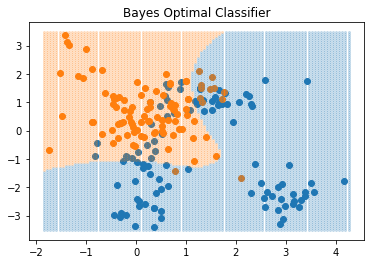

In [6]:
# Plot
fig = plt.figure(1)
ax = fig.add_subplot(1, 1, 1)
# Original data
ax.plot(sample_blue[:, 0], sample_blue[:, 1], 'o', color='C0')
ax.plot(sample_orange[:, 0], sample_orange[:, 1], 'o', color='C1')
# Bayes classifier
mask_blue = proba_blue > proba_orange
mask_orange = ~mask_blue
ax.plot(arr[mask_blue, 0], arr[mask_blue, 1], 'o',
        markersize=2, color='C0', alpha=.2)
ax.plot(arr[mask_orange, 0], arr[mask_orange, 1], 'o',
        markersize=2, color='C1', alpha=.2)
ax.set_title('Bayes Optimal Classifier')
plt.show()

### KNN and Bayes classifier

Again we see that the kNN classifier directly approximates this solution -- a majority vote in a nearest neighborhood amounts to exactly this, except that
* conditional probability at a point is relaxed to conditional probability within a neighborhood of a point,
* and probabilities are estimated by training-sample proportions.

### From two-class to $K$-class
Suppose for a two-class problem we had taken the dummy-variable approach and coded $G$ via a binary $Y$, followed by squared error loss estimation. Then

\begin{equation}
\hat{f}(X) = \text{E}(Y|X) = \text{Pr}(G=\mathcal{G}_1|X)
\end{equation}

if $\mathcal{G}_1$ corresponded to $Y=1$.

Likewise for a $K$-class problem,

\begin{equation}
\text{E}(Y_k|X) = \text{Pr}(G=\mathcal{G}_k|X).
\end{equation}

> This shows that our dummy-variable regression procedure, followed by classification to the largest fitted value, is another way of representing the Bayes classifier.

Although this theory is exact, in practice problems can occur, depending on the regression model used. For example, when linear regression is used, $\hat{f}(X)$ need not be positive, and we might be suspicious about using it as an estimate of a probability. We will discuss a variety of approaches to modeling $\text{Pr}(G|X)$ in Chapter 4.